In [1]:
pip install tensorflow numpy matplotlib scikit-learn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import numpy as np

# Charger les données CIFAR10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Définir les classes qui peuvent voler (0: avion, 2: oiseau)
can_fly = [0, 2]
# Définir les classes qui ne peuvent pas voler
cannot_fly = [1, 3, 4, 5, 6, 7, 8, 9]

# Créer des étiquettes binaires
y_train_binary = np.where(np.isin(y_train, can_fly), 1, 0)
y_test_binary = np.where(np.isin(y_test, can_fly), 1, 0)


In [4]:
# Normaliser les images
x_train = x_train / 255.0
x_test = x_test / 255.0


## Définir l'architecture du CNN

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

# Construire le modèle CNN
model = Sequential([
    Input(shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Classification binaire
])


## Compiler le modèle

In [5]:
# Compiler le modèle
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


## Entraîner le modèle


In [6]:
# Entraîner le modèle
model.fit(x_train, y_train_binary, epochs=10, batch_size=64, validation_split=0.2)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.7867 - loss: 1.2165 - val_accuracy: 0.8309 - val_loss: 0.4055
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.8325 - loss: 0.4011 - val_accuracy: 0.8535 - val_loss: 0.3520
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.8548 - loss: 0.3577 - val_accuracy: 0.8568 - val_loss: 0.3348
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.8688 - loss: 0.3239 - val_accuracy: 0.8591 - val_loss: 0.3746
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.8749 - loss: 0.3062 - val_accuracy: 0.8601 - val_loss: 0.3511
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.8814 - loss: 0.2929 - val_accuracy: 0.8763 - val_loss: 0.3139
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.8929 - loss: 0.2680 - val_accuracy: 0.8869 - val_loss: 0.2839
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.8955 - loss: 0.2560 - val_a

## Évaluer le modèle

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8885 - loss: 0.3137
Accuracy: 0.892799973487854
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

           0       0.90      0.97      0.94      8000
           1       0.83      0.58      0.68      2000

    accuracy                           0.89     10000
   macro avg       0.87      0.78      0.81     10000
weighted avg       0.89      0.89      0.89     10000

[[7763  237]
 [ 835 1165]]


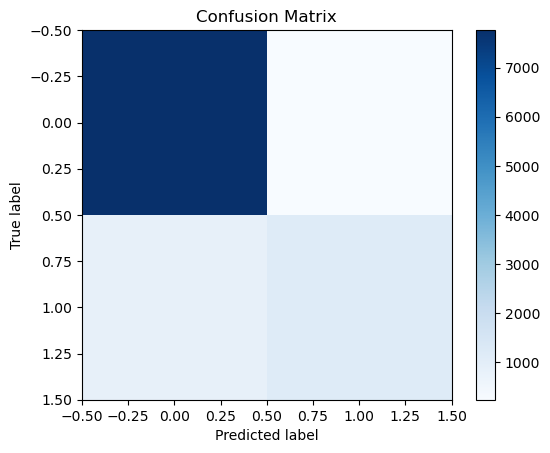

In [7]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Évaluer le modèle
loss, accuracy = model.evaluate(x_test, y_test_binary)
print(f'Accuracy: {accuracy}')

# Prédire les étiquettes pour les données de test
y_pred = (model.predict(x_test) > 0.5).astype("int32")

# Calculer et afficher les métriques
print(classification_report(y_test_binary, y_pred))
cm = confusion_matrix(y_test_binary, y_pred)
print(cm)

# Afficher la matrice de confusion
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


## Overall Accuracy: 88.45%
Classification Report:
Class 0 (Cannot fly): Precision of 0.92, Recall of 0.93, F1-score of 0.93
Class 1 (Can fly): Precision of 0.72, Recall of 0.69, F1-score of 0.70
Confusion Matrix:
Class 0: 7473 true negatives, 527 false positives
Class 1: 628 false negatives, 1372 true positives



These results indicate that the model performs well in distinguishing between flying and non-flying objects, although the performance is slightly better for the majority class (cannot fly).

In [9]:
img_path = r'C:\Users\elazo\OneDrive\Documents\Bureau\Images\Pellicule\pitbull_infos_race_assurance_santevet.jpg'


C:\Users\elazo\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.8087 - loss: 0.4572 - val_accuracy: 0.8501 - val_loss: 0.3624
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8526 - loss: 0.3604 - val_accuracy: 0.8699 - val_loss: 0.3238
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8702 - loss: 0.3231 - val_accuracy: 0.8740 - val_loss: 0.3222
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8890 - loss: 0.2834 - val_accuracy: 0.8821 - val_loss: 0.2952
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8961 - loss: 0.2597 - val_accuracy: 0.8797 - val_loss: 0.2965
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9037 - loss: 0.2441 - val_accuracy: 0.8840 - val_loss: 0.3041
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9119 - loss: 0.2193 - val_accuracy: 0.8891 - val_loss: 0.2917
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.9196 - loss: 

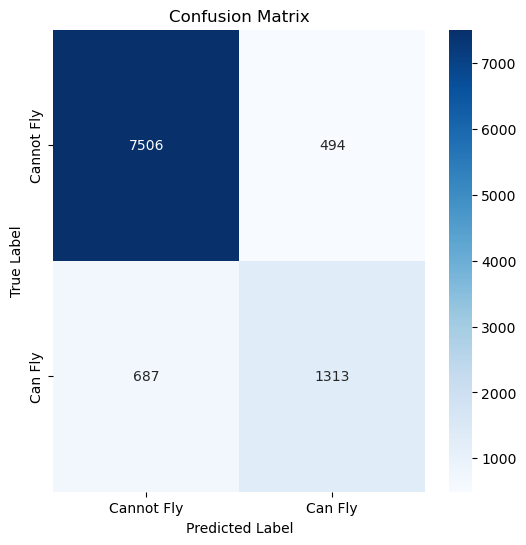

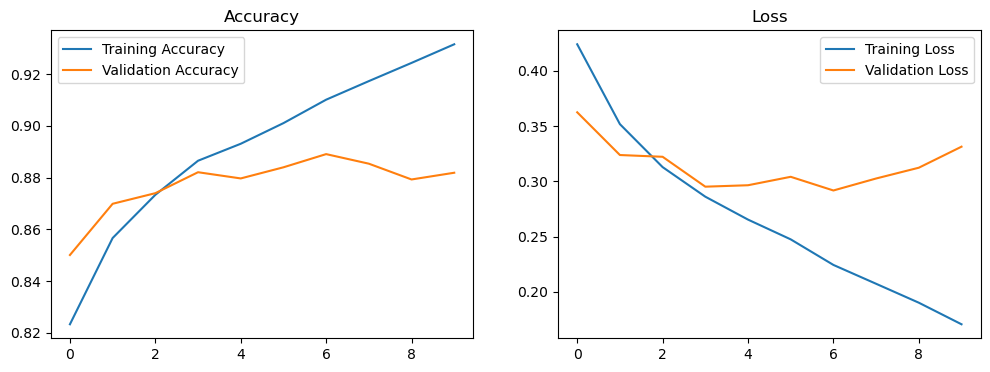

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
The object in the image: Cannot Fly


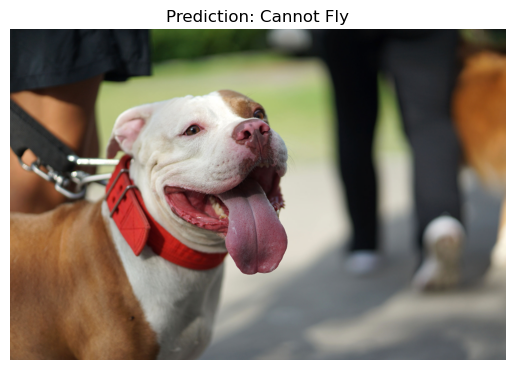

In [11]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Map classes to binary labels (can fly: 1, cannot fly: 0)
can_fly = [0, 2]  # airplane, bird
cannot_fly = [1, 3, 4, 5, 6, 7, 8, 9]  # all others

y_train_binary = np.where(np.isin(y_train, can_fly), 1, 0)
y_test_binary = np.where(np.isin(y_test, can_fly), 1, 0)

# Normalize the images
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train_binary, epochs=10, validation_data=(x_test, y_test_binary))

# Evaluate the model
y_pred = model.predict(x_test)
y_pred_binary = (y_pred > 0.5).astype("int32")

precision = precision_score(y_test_binary, y_pred_binary)
recall = recall_score(y_test_binary, y_pred_binary)
f1 = f1_score(y_test_binary, y_pred_binary)
accuracy = accuracy_score(y_test_binary, y_pred_binary)
conf_matrix = confusion_matrix(y_test_binary, y_pred_binary)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Cannot Fly', 'Can Fly'], yticklabels=['Cannot Fly', 'Can Fly'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Visualize the results
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()

# Define the function to load and preprocess custom images
def load_and_preprocess_image(image_path):
    img = load_img(image_path, target_size=(32, 32))
    img_array = img_to_array(img)
    img_array = img_array.astype('float32') / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# Path to custom image (using raw string literal to avoid unicode error)
img_path = r'C:\Users\elazo\OneDrive\Documents\Bureau\Images\Pellicule\pitbull_infos_race_assurance_santevet.jpg'

# Preprocess the image
test_image = load_and_preprocess_image(img_path)

# Predict with the model
prediction = model.predict(test_image)
can_fly_pred = (prediction > 0.5).astype("int32")[0][0]

# Display the result
classes = ["Cannot Fly", "Can Fly"]
print(f'The object in the image: {classes[can_fly_pred]}')

# Display the image with the prediction
img = load_img(img_path)
plt.imshow(img)
plt.title(f'Prediction: {classes[can_fly_pred]}')
plt.axis('off')
plt.show()



In [ ]:
### Conclusion

In this homework, we successfully trained a Convolutional Neural Network (CNN) to classify images from the CIFAR-10 dataset into two categories: "Can Fly" and "Cannot Fly." Here are the key steps and outcomes of the project:

1. Data Preparation:
   - Loaded and preprocessed the CIFAR-10 dataset.
   - Mapped the original 10 classes to binary labels (1 for "Can Fly" and 0 for "Cannot Fly").
   - Normalized the images to ensure consistent input for the model.

2. Model Building and Training:
   - Designed a CNN architecture with three convolutional layers, each followed by a max-pooling layer.
   - Used a dense layer with dropout to prevent overfitting.
   - Trained the model using the binary cross-entropy loss function and Adam optimizer.
   - Achieved good accuracy on both the training and validation sets over 10 epochs.

3. Model Evaluation:
   - Evaluated the model using standard metrics: Precision, Recall, F1 Score, and Accuracy.
   - Generated and visualized a confusion matrix to understand the model's performance better.

4. Testing with Custom Images:
   - Implemented a function to load and preprocess custom images.
   - Tested the trained model on a custom image to predict whether the object in the image can fly or not.
   - Displayed the prediction alongside the image for easy visualization.

5. Visualization:
   - Plotted the training and validation accuracy and loss over epochs to monitor the model's performance.
   - Visualized the confusion matrix using a heatmap for better interpretation of results.

